# DDoS Cybersecurity Data

# Feature Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import itertools
import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [4]:
df = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [5]:
df['attack_label'] = 0

In [6]:
for i in range(len(df)):
    if df[' Label'][i] != 'BENIGN':
        df['attack_label'][i] = 1

In [7]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [8]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225744,61326,68,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [9]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [11]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,225745.0,8.879619e+03,1.975465e+04,0.0,80.0,80.0,80.0,65532.0
Flow Duration,225745.0,1.624165e+07,3.152437e+07,-1.0,71180.0,1452333.0,8805237.0,119999937.0
Total Fwd Packets,225745.0,4.874916e+00,1.542287e+01,1.0,2.0,3.0,5.0,1932.0
Total Backward Packets,225745.0,4.572775e+00,2.175536e+01,0.0,1.0,4.0,5.0,2942.0
Total Length of Fwd Packets,225745.0,9.394633e+02,3.249403e+03,0.0,26.0,30.0,63.0,183012.0
...,...,...,...,...,...,...,...,...
Idle Mean,225745.0,1.032214e+07,2.185303e+07,0.0,0.0,0.0,8239725.0,120000000.0
Idle Std,225745.0,3.611943e+06,1.275689e+07,0.0,0.0,0.0,0.0,65300000.0
Idle Max,225745.0,1.287813e+07,2.692126e+07,0.0,0.0,0.0,8253838.0,120000000.0
Idle Min,225745.0,7.755355e+06,1.983109e+07,0.0,0.0,0.0,7422849.0,120000000.0


In [13]:
df.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
Destination Port,1.000000,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,0.658346,0.586255,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Flow Duration,0.107038,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,0.257098,0.273820,...,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003,0.025923
Total Fwd Packets,-0.044270,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,0.017458,0.030054,...,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747,-0.029870
Total Backward Packets,0.008321,0.145272,0.956714,1.000000,0.163495,0.970422,0.047501,-0.001468,0.032013,0.034200,...,0.009922,0.099090,0.228430,0.164830,0.063551,0.065554,0.028627,0.062932,0.058056,-0.069290
Total Length of Fwd Packets,0.553843,0.297832,0.174396,0.163495,1.000000,0.067425,0.852427,0.004453,0.858439,0.839139,...,-0.048262,0.185853,0.106051,0.203046,0.171280,0.261110,0.216771,0.284694,0.188569,-0.319693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.132272,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,0.262143,0.270210,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,0.110687,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,0.223047,0.232630,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,0.144428,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,0.287524,0.297282,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,0.095687,0.672003,0.094747,0.058056,0.188569,0.036789,0.194918,-0.021718,0.187498,0.191951,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
225740    False
225741    False
225742    False
225743    False
225744    False
Length: 225745, dtype: bool

In [15]:
df.drop_duplicates()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [16]:
df['attack_label'].value_counts()

1    128027
0     97718
Name: attack_label, dtype: int64

In [17]:
X = df.drop([' Destination Port',' Flow Packets/s', 'Flow Bytes/s',' Total Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max','Bwd Packet Length Max',' Flow IAT Std',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Max',' Bwd IAT Max',' Fwd Header Length',' Bwd Header Length',' Fwd Header Length.1','Fwd Packets/s',' SYN Flag Count',' Packet Length Std',' ECE Flag Count',' Average Packet Size',' Avg Fwd Segment Size', ' Avg Bwd Segment Size','Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes',' Label', 'attack_label'],axis=1)
y = df['attack_label']

In [18]:
X

,Flow Duration,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3,0,12,6,6.0,0.0,0,0.0,0.0,3.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,109,1,6,6,6.0,0.0,6,6.0,0.0,109.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,52,1,6,6,6.0,0.0,6,6.0,0.0,52.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,34,1,6,6,6.0,0.0,6,6.0,0.0,34.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,3,0,12,6,6.0,0.0,0,0.0,0.0,3.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61,1,6,6,6.0,0.0,6,6.0,0.0,61.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225741,72,1,6,6,6.0,0.0,6,6.0,0.0,72.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225742,75,1,6,6,6.0,0.0,6,6.0,0.0,75.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
225743,48,0,12,6,6.0,0.0,0,0.0,0.0,48.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: attack_label, Length: 225745, dtype: int64

In [20]:
X.shape, y.shape

((225745, 52), (225745,))

# Information Gain

<AxesSubplot:>

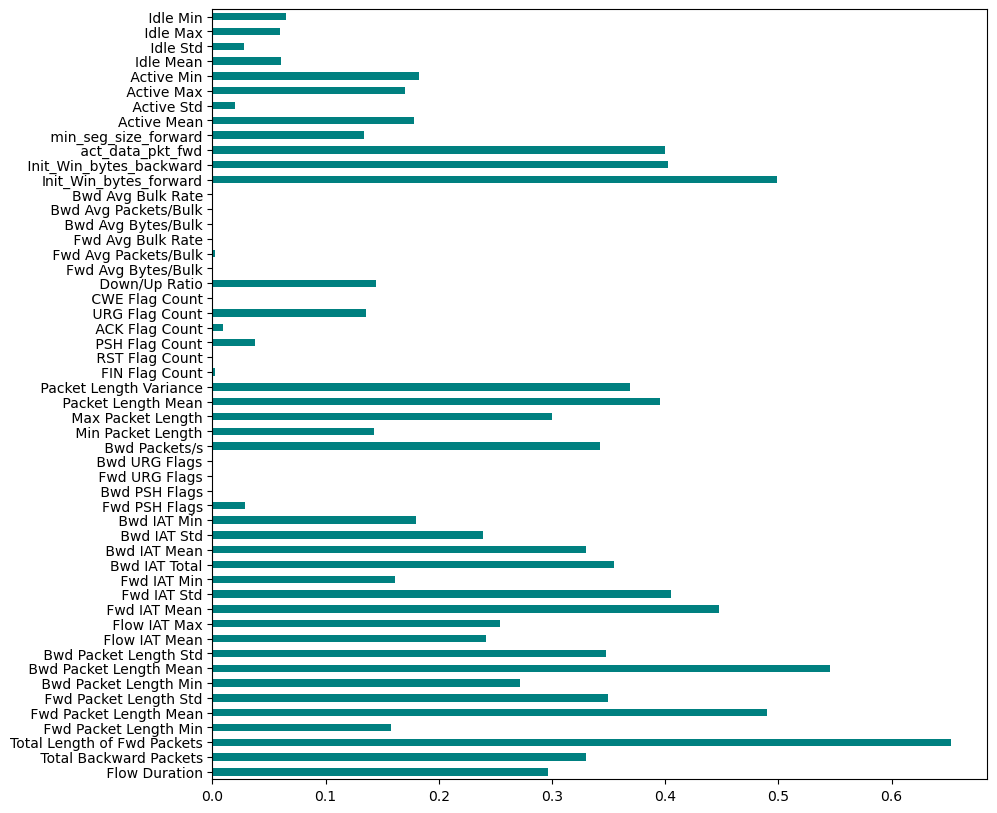

In [21]:
plt.figure(figsize = (10,10))

from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)

feat_importance = pd.Series(importance, X.columns[0: len(X.columns)])

feat_importance.plot(kind='barh', color='teal')